## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "TCC/WDDM"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout

def build_mlp(input_shape,output_unit = 10 , num_nerous=[512,256,128,64],drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i ,num in enumerate(num_nerous):
        if i == 0 :
            x = keras.layers.Dense(units = num ,
                                  activation = 'relu',
                                  name = 'hidden_layers'+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else :
            x = keras.layers.Dense( units = num ,
                                  activation = 'relu', 
                                  name = 'hidden_layers'+str(i+1))(x)
            x = Dropout(drp_ratio)(x)

        output = keras.layers.Dense( units = output_unit,
                                   activation = 'softmax',
                                   name = 'output_layers')(x)
        model = keras.models.Model(inputs = [input_layer],
                                  outputs = [output])
    return model

In [15]:
"""Code Here
設定超參數
"""
Dropout_EXP = [0.25,0.5,0.75]
EPOCH = 20
LEARNING_RATE = 0.001
BATCH_SIZE = 256





In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for exp in Dropout_EXP:
    model = build_mlp(input_shape = x_train.shape[1:],drp_ratio = exp)
    optimizers = keras.optimizers.Adam(lr = LEARNING_RATE)
    model.compile(loss = 'categorical_crossentropy',
                                      metrics = 'acc',
                                      optimizer = optimizers)
    model.fit(x_train,y_train,
             epochs=EPOCH,
             batch_size=BATCH_SIZE,
             validation_data=(x_test,y_test),
             shuffle=True)
    exp_string = 'Dropout_EXP:'+str(exp)
    results[exp_string]={"train_loss":model.history.history['loss'],
                    "valid_loss":model.history.history['val_loss'],
                    "train_acc":model.history.history['acc'],
                    "valid_acc":model.history.history['val_acc']}

Epoch 1/20
196/196 [==============================] - 2s 11ms/step - loss: 2.1260 - acc: 0.1964 - val_loss: 1.9361 - val_acc: 0.2908
Epoch 2/20
196/196 [==============================] - 2s 11ms/step - loss: 1.9585 - acc: 0.2741 - val_loss: 1.8583 - val_acc: 0.3107
Epoch 3/20
196/196 [==============================] - 2s 11ms/step - loss: 1.9019 - acc: 0.2997 - val_loss: 1.7841 - val_acc: 0.3529
Epoch 4/20
196/196 [==============================] - 2s 11ms/step - loss: 1.8649 - acc: 0.3138 - val_loss: 1.7639 - val_acc: 0.3742
Epoch 5/20
196/196 [==============================] - 2s 11ms/step - loss: 1.8409 - acc: 0.3269 - val_loss: 1.7502 - val_acc: 0.3731
Epoch 6/20
196/196 [==============================] - 2s 11ms/step - loss: 1.8119 - acc: 0.3362 - val_loss: 1.7372 - val_acc: 0.3872
Epoch 7/20
196/196 [==============================] - 2s 11ms/step - loss: 1.8004 - acc: 0.3419 - val_loss: 1.7013 - val_acc: 0.4016
Epoch 8/20
196/196 [==============================] - 2s 11ms/step - 

In [27]:
results['Dropout_EXP:0.25'].keys()

dict_keys(['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])

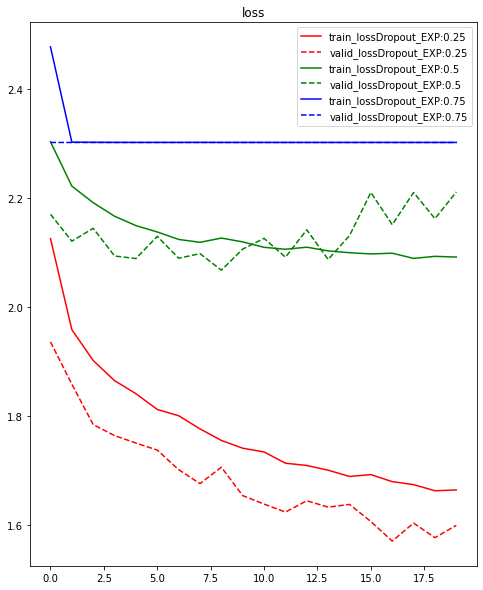

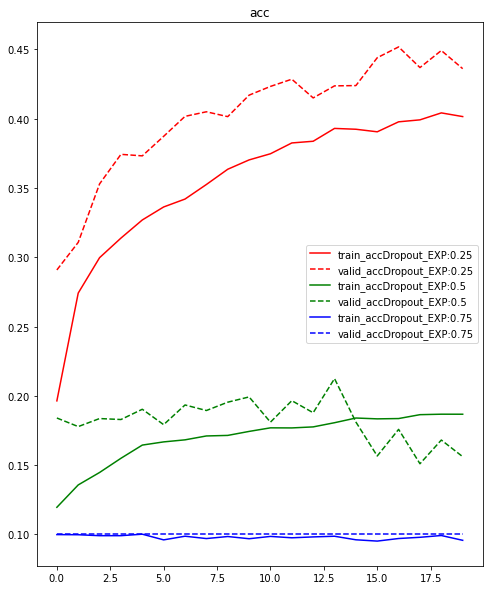

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,10))
for i , cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),
             results[cond]['train_loss'],'-',label='train_loss'+str(cond),color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),
             results[cond]['valid_loss'],'--',label='valid_loss'+str(cond),color=color_bar[i])
    plt.legend(loc='best')
    plt.title('loss')
plt.show()

plt.figure(figsize=(8,10))
for i , cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),
             results[cond]['train_acc'],'-',label='train_acc'+str(cond),color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),
             results[cond]['valid_acc'],'--',label='valid_acc'+str(cond),color=color_bar[i])
    plt.legend(loc='best')
    plt.title('acc')
plt.show()